# Freiraumausbreitung



In [50]:
import numpy as np
import matplotlib.pyplot as plt

minx, maxx = 0, 10
miny, maxy = -10, 10
stepsx, stepsy = 101, 101

t = np.linspace(minx, maxx, stepsx)
y = np.linspace(miny, maxy, stepsy)

X, Y = np.meshgrid(t, y)

In [49]:
#Komplexer Modulator
def m(t,f):
    a =  lambda x: 0 if np.cos(x) > 0 else 1 # Amplitude
    a = np.vectorize(a)
    p = np.pi/2     # phase
    f = f           # Frequenz
    return a(t)*np.exp(1j*2*np.pi*f*t+p)

# Annahme
def s(t,f=1):
    return np.real(np.exp(1j*2*np.pi*f*t)*m(t,f))

#komplexer Kanalkoeffizient
def h(t,f=1):
    #dämpfung
    d = 1/3
    #phase
    p = np.log(t)
    return np.exp(-t*d+p)

#Signal Verzögerung
tau = 2
def r(t,f=1):
    return s(t-tau,f)*h(t-tau,f)
#Auf Empfängerseite geschetztes M
def m_estimate(t,f):
    return r(t,f)*np.exp(-1j*2*np.pi*f*t)*(h(t,f)*h(t,f)**-1)





## Plots


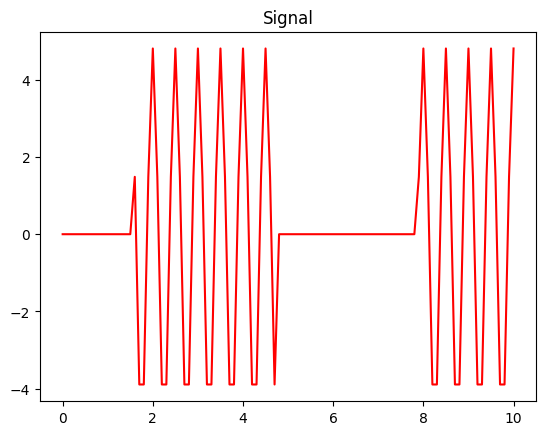

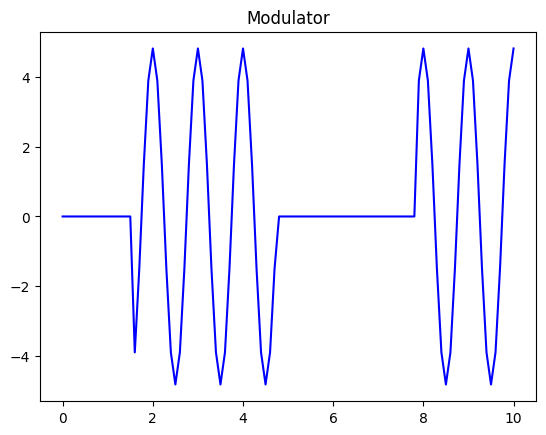

C:\Users\guita\AppData\Local\Temp\ipykernel_10020\950511631.py:18: RuntimeWarning: divide by zero encountered in log
  p = np.log(t)


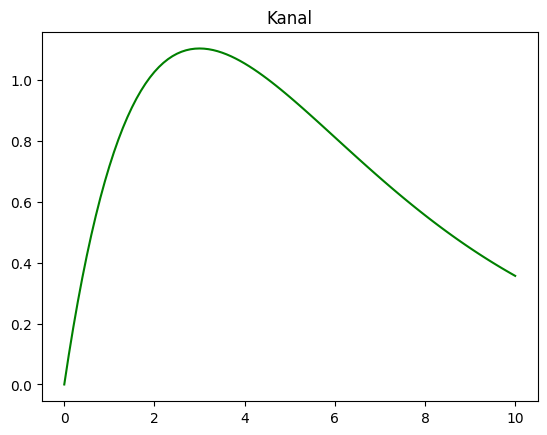

C:\Users\guita\AppData\Local\Temp\ipykernel_10020\950511631.py:18: RuntimeWarning: invalid value encountered in log
  p = np.log(t)


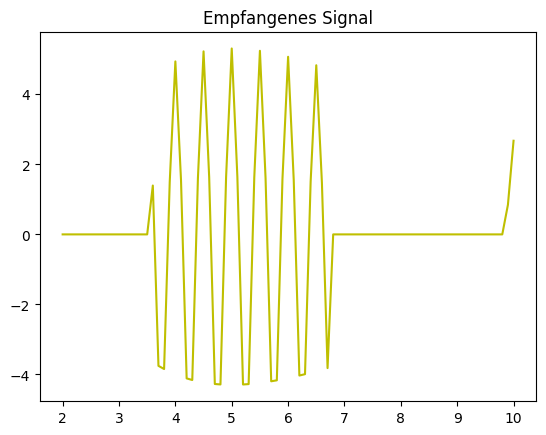

C:\Users\guita\AppData\Local\Temp\ipykernel_10020\950511631.py:27: RuntimeWarning: divide by zero encountered in reciprocal
  return r(t,f)*np.exp(-1j*2*np.pi*f*t)*(h(t,f)*h(t,f)**-1)
C:\Users\guita\AppData\Local\Temp\ipykernel_10020\950511631.py:27: RuntimeWarning: invalid value encountered in multiply
  return r(t,f)*np.exp(-1j*2*np.pi*f*t)*(h(t,f)*h(t,f)**-1)


Text(0.5, 1.0, 'Geschätztes Signal')

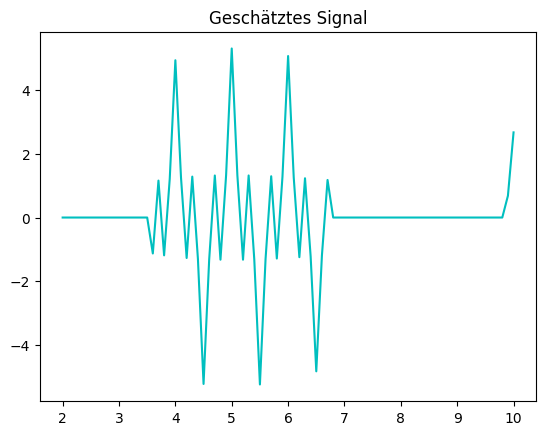

In [58]:

plt.plot(t, s(t),"r")
plt.title("Signal")
plt.show()

plt.plot(t, m(t,1),"b")
plt.title("Modulator")
plt.show()

plt.plot(t, h(t),"g")
plt.title("Kanal")
plt.show()

plt.plot(t, r(t),"y")
plt.title("Empfangenes Signal")
plt.show()

plt.plot(t, m_estimate(t,1),"c")
plt.title("Geschätztes Signal")




# Kanal

In [ ]:
plt.plot(t, h(t),"g")